11501568/11490434 [==============================] - 65s 6us/step


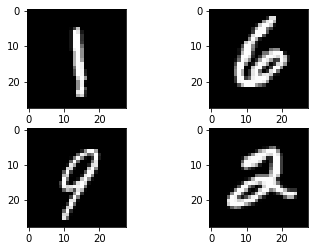

In [1]:
# ejemplo mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 imagenes en escala de grises
plt.subplot(221)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[22], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# muestra el plot
plt.show()

In [2]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [3]:
# generador de números aleatorios
seed = 7
numpy.random.seed(seed)

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [14]:
num_pixels

784

In [15]:
# normalizamos las entradas desde 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
num_classes

10

In [20]:
# definismos la linea base del modelo
def baseline_model():
  # creamos el modelo
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compilamos el modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
# construye el modelo
model = baseline_model()
# ajusta el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluacion del model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error de linea base: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2819 - accuracy: 0.9189 - val_loss: 0.1383 - val_accuracy: 0.9596 - 3s/epoch - 10ms/step
Epoch 2/10
300/300 - 3s - loss: 0.1118 - accuracy: 0.9679 - val_loss: 0.0991 - val_accuracy: 0.9705 - 3s/epoch - 8ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0716 - accuracy: 0.9796 - val_loss: 0.0780 - val_accuracy: 0.9756 - 2s/epoch - 8ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.0642 - val_accuracy: 0.9801 - 2s/epoch - 8ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0367 - accuracy: 0.9901 - val_loss: 0.0658 - val_accuracy: 0.9790 - 2s/epoch - 8ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0270 - accuracy: 0.9926 - val_loss: 0.0609 - val_accuracy: 0.9809 - 3s/epoch - 8ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0211 - accuracy: 0.9949 - val_loss: 0.0647 - val_accuracy: 0.9794 - 2s/epoch - 8ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0573 - val_accuracy: 0.9818 - 2s/epoch - 8ms/step
Epoch 9/10
300/300 - 2s

In [22]:
import cv2

In [23]:
imagepath='D:/Analitica/easyocr/thresh.jpg'
image_2 = cv2.imread(imagepath)
#display(Image.fromarray(image_2)) 

In [27]:
gray=cv2.cvtColor(image_2,cv2.COLOR_RGB2GRAY) 

In [28]:
model.predict(gray)

ValueError: in user code:

    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 523)


In [26]:
image_2.shape

(147, 523, 3)

In [30]:
X_train.shape

(60000, 784)

In [31]:
X_test.shape

(10000, 784)

In [34]:
gray.shape

(147, 523)